In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


In [14]:
tf.config.experimental.list_physical_devices()
tf.test.is_built_with_cuda()

True

In [3]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [5]:
X_train[0].shape

(32, 32, 3)

In [7]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255
y_train_encoded = keras.utils.to_categorical(y_train, num_classes = 10, dtype = 'float32')
y_test_encoded = keras.utils.to_categorical(y_test, num_classes = 10, dtype = 'float32')

In [9]:
def get_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])
    model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model

model = get_model()

model.summary()

2023-04-12 08:22:46.518643: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-12 08:22:48.098888: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-12 08:22:48.099080: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-12 08:22:48.140727: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-12 08:22:48.140906: I tensorflow/compiler/xla/stream_executo

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 3000)              9219000   
                                                                 
 dense_1 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_2 (Dense)             (None, 10)                10010     
                                                                 
Total params: 12,230,010
Trainable params: 12,230,010
Non-trainable params: 0
_________________________________________________________________


In [10]:
%%timeit -n1 -r1
# CPU
with tf.device('/CPU:0'):
    model_cpu = get_model()
    model_cpu.fit(X_train_scaled, y_train_encoded, epochs = 10)

Epoch 1/10


2023-04-12 08:23:37.596312: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f324c009240 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-04-12 08:23:37.596350: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): Host, Default Version


   1/1563 [..............................] - ETA: 1:03:03 - loss: 2.3228 - accuracy: 0.0938

2023-04-12 08:23:38.666221: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 [==============================] - 38s 23ms/step - loss: 1.8118 - accuracy: 0.3540
Epoch 2/10
1563/1563 [==============================] - 35s 23ms/step - loss: 1.6227 - accuracy: 0.4284
Epoch 3/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.5410 - accuracy: 0.4568
Epoch 4/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.4809 - accuracy: 0.4787
Epoch 5/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.4329 - accuracy: 0.4983
Epoch 6/10
1563/1563 [==============================] - 35s 23ms/step - loss: 1.3869 - accuracy: 0.5128
Epoch 7/10
1563/1563 [==============================] - 35s 23ms/step - loss: 1.3487 - accuracy: 0.5259
Epoch 8/10
1563/1563 [==============================] - 35s 23ms/step - loss: 1.3146 - accuracy: 0.5379
Epoch 9/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.2811 - accuracy: 0.5509
Epoch 10/10
1563/1563 [==============================] - 35s 22ms/step - lo

In [11]:
%%timeit -n1 -r1
# GPU
with tf.device('/GPU:0'):
    model_gpu = get_model()
    model_gpu.fit(X_train_scaled, y_train_encoded, epochs = 10)

Epoch 1/10


2023-04-12 08:29:46.430070: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-04-12 08:29:46.737944: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f2b847dba50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-04-12 08:29:46.737970: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9


1563/1563 [==============================] - 10s 1ms/step - loss: 1.8156 - accuracy: 0.3547
Epoch 2/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.6213 - accuracy: 0.4265
Epoch 3/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.5415 - accuracy: 0.4563
Epoch 4/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.4792 - accuracy: 0.4772
Epoch 5/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.4294 - accuracy: 0.4951
Epoch 6/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.3875 - accuracy: 0.5100
Epoch 7/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.3486 - accuracy: 0.5272
Epoch 8/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.3149 - accuracy: 0.5387
Epoch 9/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.2823 - accuracy: 0.5524
Epoch 10/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.2502 - accura

In [15]:
# loading dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# checking shape

print(train_images.shape)

print(train_labels[0])

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
9


'Ankle boot'

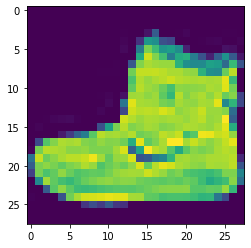

In [16]:
# checking images
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.imshow(train_images[0])
class_names[train_labels[0]]

In [17]:
# scaling
train_images_scaled = train_images / 255.0
test_images_scaled = test_images / 255.0

def get_model(hidden_layers=1):
    # Flatten layer for input
    layers = [keras.layers.Flatten(input_shape=(28, 28))]
    # hideen layers
    for i in range(hidden_layers):
        layers.append(keras.layers.Dense(500, activation='relu'),)
    # output layer    
    layers.append(keras.layers.Dense(10, activation='sigmoid'))
    model = keras.Sequential(layers)
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [20]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model(hidden_layers=5)
    cpu_model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
   1/1875 [..............................] - ETA: 28:25 - loss: 2.2742 - accuracy: 0.2500

2023-04-12 08:33:45.977484: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


1875/1875 [==============================] - 9s 4ms/step - loss: 0.5171 - accuracy: 0.8122
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3905 - accuracy: 0.8589
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3534 - accuracy: 0.8735
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3279 - accuracy: 0.8812
Epoch 5/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3100 - accuracy: 0.8882
42.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [21]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    gpu_model = get_model(hidden_layers=5)
    gpu_model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5173 - accuracy: 0.8147
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3913 - accuracy: 0.8597
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3513 - accuracy: 0.8722
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3320 - accuracy: 0.8805
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3090 - accuracy: 0.8866
18.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
